In [5]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import torch
torch.cuda.is_available()

True

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import torchvision

from torchvision import datasets, transforms

In [12]:
import os

In [13]:
# Joining Directory Paths

for root,directory_names,file_names in os.walk('/home/wei/workspace/msda/dl/archive/orig/archive', topdown=True):
    for each_file_name in file_names:
        os.path.join(root, each_file_name)
        print(os.path.join(root, each_file_name))

/home/wei/workspace/msda/dl/archive/orig/archive/1/09867.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/12496_1.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/04067.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/16732_1.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/18490_1.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/13548_1.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/06029.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/07447.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/15109_1.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/07250.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/04547.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/11457_1.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/00066.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/05734.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/15173_1.jpg
/home/wei/workspace/msda/dl/archive/orig/archive/1/10583_1.jpg
/home/we

In [14]:
input = '/home/wei/workspace/msda/dl/archive/orig/archive'

In [15]:
# Data Preprocessing

image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                     validation_split=0.2,
                                     horizontal_flip=True, #Data Augmentation
                                     vertical_flip=True,   #Data Augmentation
                                     rotation_range=15,    #Data Augmentation
                                     fill_mode='nearest')

training_dataset = image_generator.flow_from_directory(input,
                                                       batch_size=32,
                                                       shuffle=True,
                                                       target_size=(128,128),
                                                       subset="training",
                                                       class_mode="binary")

validation_dataset = image_generator.flow_from_directory(input,
                                                       batch_size=32,
                                                       shuffle=True,
                                                       target_size=(128,128),
                                                       subset="validation",
                                                       class_mode="binary")

# Original Dataset divided into Training(80%) and Validation(20%) datasets

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [16]:
from tensorflow.keras import layers,models

crack_detection_model = models.Sequential()

# Input Layer - Convolutional
crack_detection_model.add(layers.Conv2D(256, # 256 - no of filters (also, no of output images)
                                 (1,1),
                                 strides=(1,1),
                                 padding="valid",
                                 use_bias=True,
                                 input_shape=(128,128,3),
                                 activation="relu"
                                 )
                          )

# Five Hidden layers - Maxpool, Convolutional, Maxpool, Convolutional, Maxpool
crack_detection_model.add(layers.MaxPooling2D(pool_size=(2,2),
                                       padding="valid",
                                       strides=(2,2), # In MaxPooling2D, strides anyway default to pool_size
                                       )
                         )

crack_detection_model.add(layers.Conv2D(256, #no of filters (also, no of output images)
                                 (1,1),
                                 strides=(1,1),
                                 padding="valid",
                                 use_bias=True,
                                 activation="relu"
                                 )
                          )

crack_detection_model.add(layers.MaxPooling2D(pool_size=(2,2),
                                       padding="valid",
                                       strides=(2,2),
                                       )
                         )

crack_detection_model.add(layers.Conv2D(256,
                                 (1,1),
                                 strides=(1,1),
                                 padding="valid",
                                 use_bias=True,
                                 activation="relu"
                                 )
                          )

crack_detection_model.add(layers.MaxPooling2D(pool_size=(2,2),
                                       padding="valid",
                                       strides=(1,1)
                                       )
                         )

 #Flattening the pixel matrix to feed the dense layer
crack_detection_model.add(layers.Flatten())

# Three Hidden Layers - Dense NN
crack_detection_model.add(layers.Dense(128,
                                       activation='relu',
                                       kernel_regularizer='l2'),
                          )

crack_detection_model.add(layers.Dense(64,
                                       activation='relu',
                                       kernel_regularizer='l2'),
                          )

crack_detection_model.add(layers.Dense(32,
                                       activation='relu',
                                       kernel_regularizer='l2'),
                          )

crack_detection_model.add(layers.Dense(8,
                                       activation='relu',
                                       kernel_regularizer='l2'),
                          )

# Output Layer - Single node with Sigmoid/SoftMax activation function for classification
crack_detection_model.add(layers.Dense(1,
                                       activation='sigmoid',
                                       kernel_regularizer='l2'),
                          )



In [17]:
crack_detection_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 256)     1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 256)       65792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       65792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0

In [18]:
crack_detection_model.compile(loss='binary_crossentropy', 
                              optimizer=keras.optimizers.Adam(), 
                              metrics=['accuracy'],
                              )

In [19]:
hist = crack_detection_model.fit(training_dataset,
                                 validation_data=validation_dataset, 
                                 epochs=10,
                                 )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/10
1000/1000 [==============================] - 149s 149ms/step - loss: 0.5058 - accuracy: 0.8958 - val_loss: 0.2322 - val_accuracy: 0.9750
Epoch 2/10
1000/1000 [==============================] - 147s 147ms/step - loss: 0.2546 - accuracy: 0.9732 - val_loss: 0.1953 - val_accuracy: 0.9794
Epoch 3/10
1000/1000 [==============================] - 147s 147ms/step - loss: 0.2449 - accuracy: 0.9736 - val_loss: 0.1775 - val_accuracy: 0.9804
Epoch 4/10
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1889 - accuracy: 0.9751 - val_loss: 0.1895 - val_accuracy: 0.9786
Epoch 5/10
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1784 - accuracy: 0.9754 - val_loss: 0.1339 - val_accuracy: 0.9820
Epoch 6/10
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1658 - accuracy: 0.9764 - val_loss: 0.1462 - val_accuracy: 0.9822
Epoch 7/10
1000/1

In [27]:
crack_detection_model.save("cnn_1.h5")
print("Saved model to disk")

Saved model to disk


In [46]:
hist2 = crack_detection_model.fit(training_dataset,
                                 validation_data=validation_dataset, 
                                 epochs=20,
                                 )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/20
1000/1000 [==============================] - 146s 146ms/step - loss: 0.1492 - accuracy: 0.9769 - val_loss: 0.1369 - val_accuracy: 0.9794
Epoch 2/20
1000/1000 [==============================] - 146s 146ms/step - loss: 0.1419 - accuracy: 0.9778 - val_loss: 0.1333 - val_accuracy: 0.9825
Epoch 3/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1282 - accuracy: 0.9793 - val_loss: 0.1244 - val_accuracy: 0.9860
Epoch 4/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1295 - accuracy: 0.9803 - val_loss: 0.1120 - val_accuracy: 0.9845
Epoch 5/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1203 - accuracy: 0.9817 - val_loss: 0.1095 - val_accuracy: 0.9824
Epoch 6/20
1000/1000 [==============================] - 147s 147ms/step - loss: 0.1195 - accuracy: 0.9833 - val_loss: 0.1015 - val_accuracy: 0.9887
Epoch 7/20
1000/1

In [13]:
hist_cnn_1a = hist.history


In [21]:
hist.history['accuracy']

[0.8957813,
 0.9731563,
 0.973625,
 0.9750937,
 0.9754375,
 0.976375,
 0.9773125,
 0.97840625,
 0.9815937,
 0.98375]

In [49]:
hist2.history['accuracy']

[0.9769375,
 0.97778124,
 0.97928125,
 0.98025,
 0.98165625,
 0.98328125,
 0.98503125,
 0.98603123,
 0.98696876,
 0.98665625,
 0.98753124,
 0.9864375,
 0.9873437,
 0.9870625,
 0.9871875,
 0.98684376,
 0.98753124,
 0.98784375,
 0.98890626,
 0.98725]

In [14]:
loss_values = hist_cnn_1a['loss']
val_loss_values = hist_cnn_1a['val_loss']
acc_values = hist_cnn_1a['accuracy']
val_acc_values = hist_cnn_1a['val_accuracy']
epochs = range(1, len(loss_values) + 1)

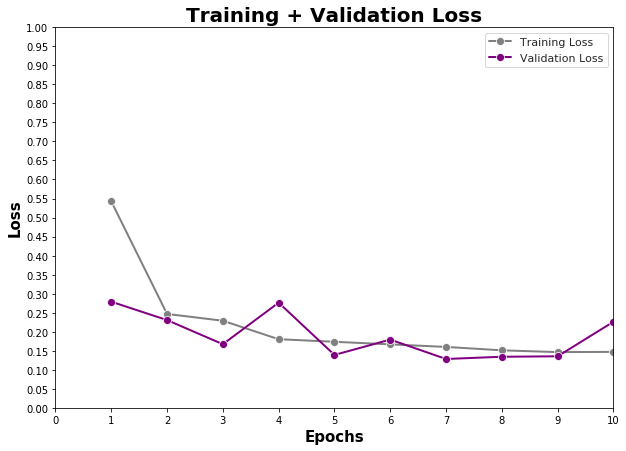

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))
sns.lineplot(epochs, loss_values, label='Training Loss', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_loss_values, label='Validation Loss', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Loss', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Loss', size=15, weight='bold')
plt.axis([0,10,0,1])
plt.legend()
plt.show()

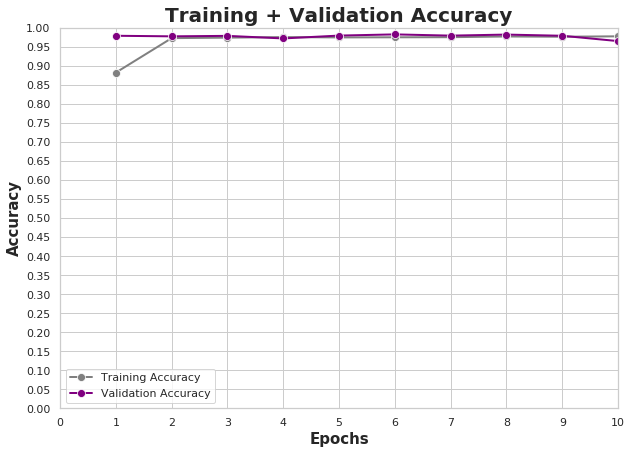

In [16]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))
sns.lineplot(epochs, acc_values, label='Training Accuracy', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_acc_values, label='Validation Accuracy', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Accuracy', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Accuracy', size=15, weight='bold')
plt.axis([0,10,0,1])
plt.legend()
plt.show()
# plt.savefig('cnn_vanilla_tuned_accuracy.pdf')

In [57]:
hist_cnn_2a = hist2.history
loss_values = hist_cnn_2a['loss']
val_loss_values = hist_cnn_2a['val_loss']
acc_values = hist_cnn_2a['accuracy']
val_acc_values = hist_cnn_2a['val_accuracy']
epochs = range(1, len(loss_values) + 1)

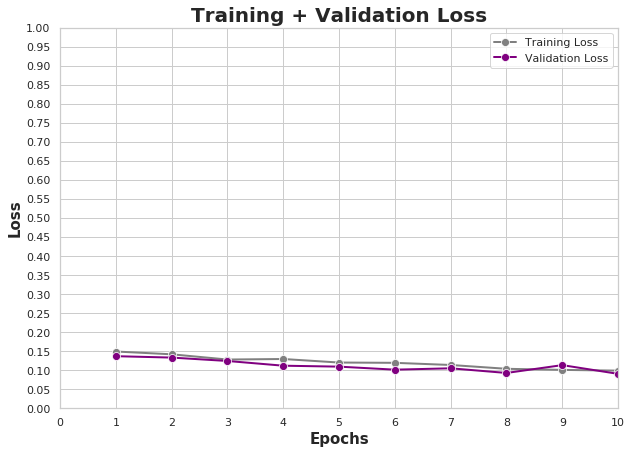

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))
sns.lineplot(epochs, loss_values, label='Training Loss', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_loss_values, label='Validation Loss', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Loss', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Loss', size=15, weight='bold')
plt.axis([0,10,0,1])
plt.legend()
plt.show()

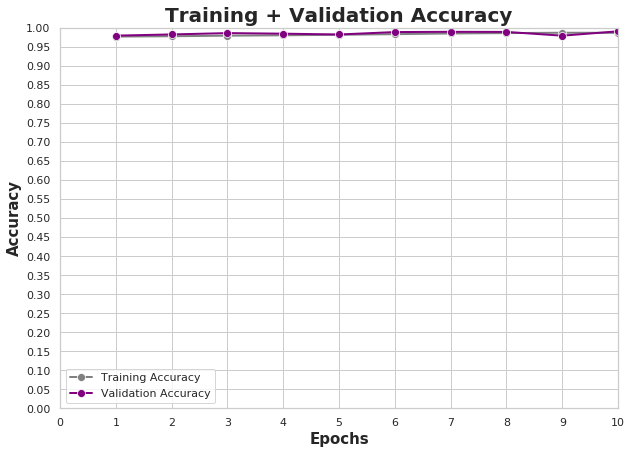

In [59]:
plt.figure(figsize=(10, 7))
ax = plt.subplot()
sns.set(style='whitegrid', font_scale=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(.05))
sns.lineplot(epochs, acc_values, label='Training Accuracy', linewidth=2, marker='o', markersize=8, color='grey')
sns.lineplot(epochs, val_acc_values, label='Validation Accuracy', linewidth=2, marker='o', markersize=8, color='purple')
plt.title('Training + Validation Accuracy', size=20, weight='bold')
plt.xlabel('Epochs', size=15, weight='bold')
plt.ylabel('Accuracy', size=15, weight='bold')
plt.axis([0,10,0,1])
plt.legend()
plt.show()
# plt.savefig('cnn_vanilla_tuned_accuracy.pdf')

In [ ]:
checkpoint = torch.load(dir)
model.load_state_dict(checkpoint['net'])
optimizer.load_state_dict(checkpoint['optimizer'])
start_epoch = checkpoint['epoch'] + 1

In [7]:
import os, random, shutil
def moveFile(fileDir):
        pathDir = os.listdir(fileDir)    
        filenumber=len(pathDir)
        rate=0.1   
        picknumber=int(filenumber*rate) 
        sample = random.sample(pathDir, picknumber)  
        print (sample)
        for name in sample:
                shutil.move(fileDir+name, tarDir+name)
        return

if __name__ == '__main__':
    fileDir = "/home/wei/workspace/msda/dl/archive/augumented/0/"    #source
    tarDir = '/home/wei/workspace/msda/dl/archive/augu/0/'    #target
    moveFile(fileDir)


['Aug_0_09304.jpg', 'Aug_3_08478.jpg', 'Aug_0_10482.jpg', 'Aug_2_03800.jpg', 'Aug_2_16770.jpg', 'Aug_1_14211.jpg', 'Aug_1_12112.jpg', 'Aug_0_13238.jpg', 'Aug_4_09271.jpg', 'Aug_0_05571.jpg', 'Aug_2_04887.jpg', 'Aug_0_13063.jpg', 'Aug_0_08164.jpg', 'Aug_4_02321.jpg', 'Aug_3_17767.jpg', 'Aug_2_15522.jpg', 'Aug_4_08644.jpg', 'Aug_4_11009.jpg', 'Aug_3_11325.jpg', 'Aug_0_18154.jpg', 'Aug_1_13446.jpg', 'Aug_3_04533.jpg', 'Aug_3_10762.jpg', 'Aug_4_14735.jpg', 'Aug_0_03147.jpg', 'Aug_4_08134.jpg', 'Aug_0_04229.jpg', 'Aug_4_16207.jpg', 'Aug_2_01281.jpg', 'Aug_4_03099.jpg', 'Aug_4_18357.jpg', 'Aug_4_11003.jpg', 'Aug_1_12304.jpg', 'Aug_0_16034.jpg', 'Aug_2_10238.jpg', 'Aug_4_10304.jpg', 'Aug_1_15830.jpg', 'Aug_0_09342.jpg', 'Aug_2_15542.jpg', 'Aug_3_01436.jpg', 'Aug_0_01842.jpg', 'Aug_3_09357.jpg', 'Aug_1_09879.jpg', 'Aug_1_07349.jpg', 'Aug_4_05256.jpg', 'Aug_1_09812.jpg', 'Aug_1_10114.jpg', 'Aug_2_07924.jpg', 'Aug_4_19453.jpg', 'Aug_3_15222.jpg', 'Aug_3_10344.jpg', 'Aug_3_15870.jpg', 'Aug_4_1461

In [8]:
import os
path = '/home/wei/workspace/msda/dl/archive/augumented/0'      # 输入文件夹地址
files = os.listdir(path)   # 读入文件夹
num_png = len(files)
print(num_png)

90000


In [9]:
path = '/home/wei/workspace/msda/dl/archive/augu/0'      # 输入文件夹地址
files = os.listdir(path)   # 读入文件夹
num_png = len(files)
print(num_png)

10000


In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
data_test = ImageDataGenerator(rescale=1/255).flow_from_directory( 
    '/home/wei/workspace/msda/dl/archive/augu',
    target_size=(128, 128),
    batch_size=10000,
    shuffle=True,
    class_mode="binary")

images_test, labels_test = next(data_test)




Using TensorFlow backend.


Found 20000 images belonging to 2 classes.


In [7]:
from keras.models import Sequential, load_model, Input, Model
from tensorflow import keras
cnn_loaded = tf.keras.models.load_model('cnn_1.h5')
cnn_loaded.evaluate(images_test, labels_test)

10000/10000 [==============================] - 21s 2ms/sample - loss: 0.0899 - accuracy: 0.9885


[0.08986686413288117, 0.9885]

In [9]:
# y_pred = cnn_loaded.predict(images_test)

In [15]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import confusion_matrix
# conf_matrix = pd.DataFrame(
#     confusion_matrix(
#         np.argmax(labels_test, axis=1),
#         np.argmax(y_pred, axis=1)
#     ),
#     index = ['Actual Cracked', 'Actual Not Cracked'], 
#     columns = ['Predicted Cracked', 'Predicted Not Cracked']
# )
# conf_matrix

AxisError: axis 1 is out of bounds for array of dimension 1